<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Estudo_Ibov_%26_Dolar_Correl%C3%A7%C3%B5es_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as wb

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [4]:
#Obtendo oa dados do mercado.
bova11 = wb.get_data_yahoo("BOVA11.SA") #start="2018-01-01", and="2019-01-01")
bova11

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-12-02,35.110001,35.810001,34.910000,35.389999,35.389999,759900
2008-12-03,34.730000,35.400002,33.900002,35.310001,35.310001,330100
2008-12-04,35.799999,36.000000,35.150002,35.700001,35.700001,128400
2008-12-05,34.509998,35.349998,34.110001,35.349998,35.349998,193700
2008-12-08,37.349998,38.459999,36.950001,38.459999,38.459999,103100
...,...,...,...,...,...,...
2020-04-17,76.459999,76.930000,74.849998,76.000000,76.000000,7119750
2020-04-20,74.160004,77.239998,74.120003,75.940002,75.940002,8754410
2020-04-22,76.000000,78.250000,75.989998,77.820000,77.820000,9776490


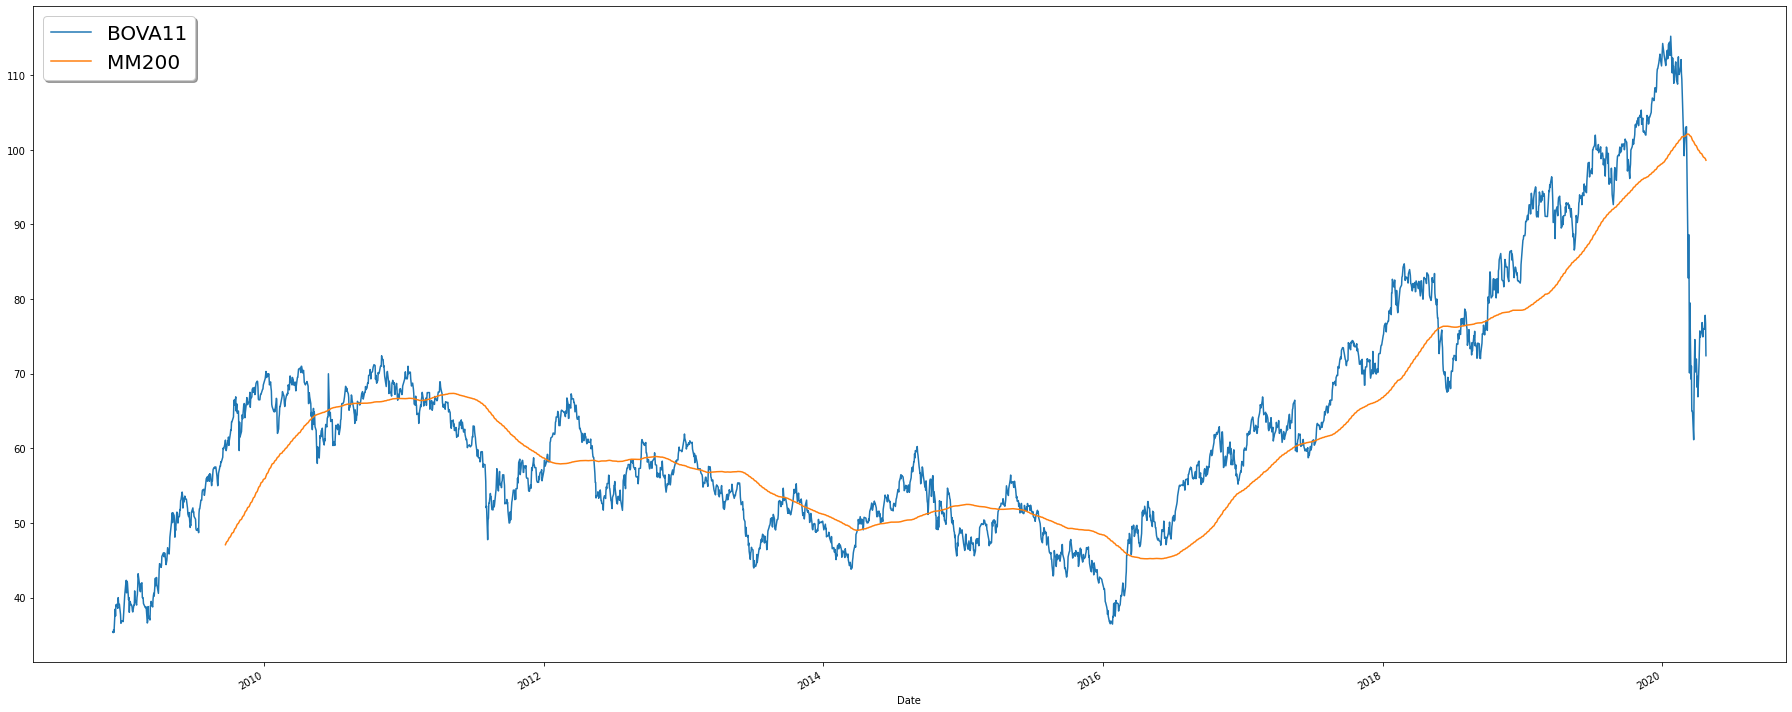

In [5]:
bova11["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova11["Adj Close"].rolling(200).mean().plot(label ="MM200")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

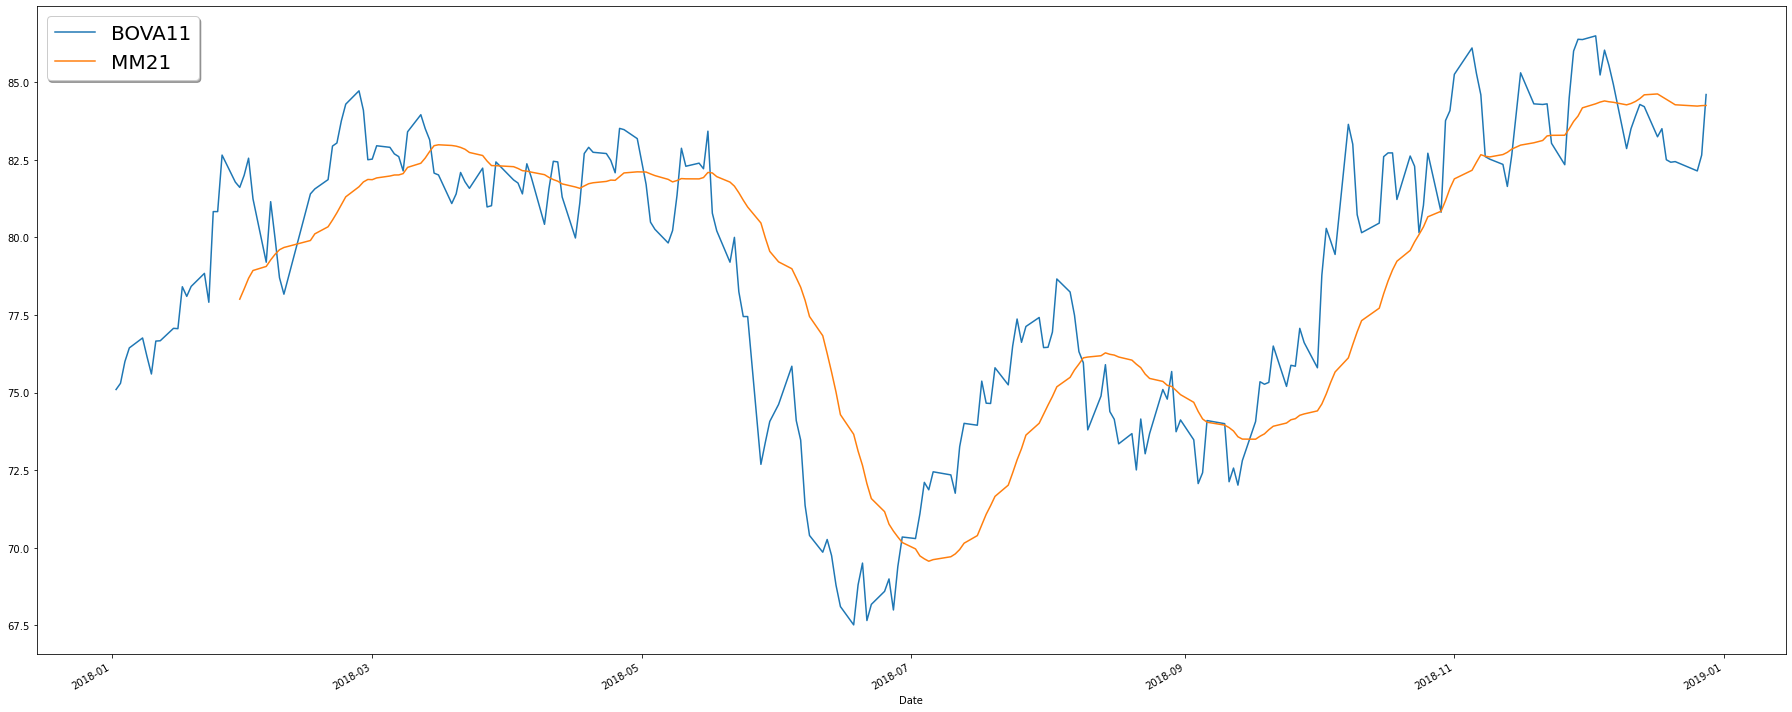

In [6]:
#selecionando um ano específico.
bova_fatiado = bova11[bova11.index.year==2018]
bova_fatiado["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova_fatiado["Adj Close"].rolling(21).mean().plot(label ="MM21")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

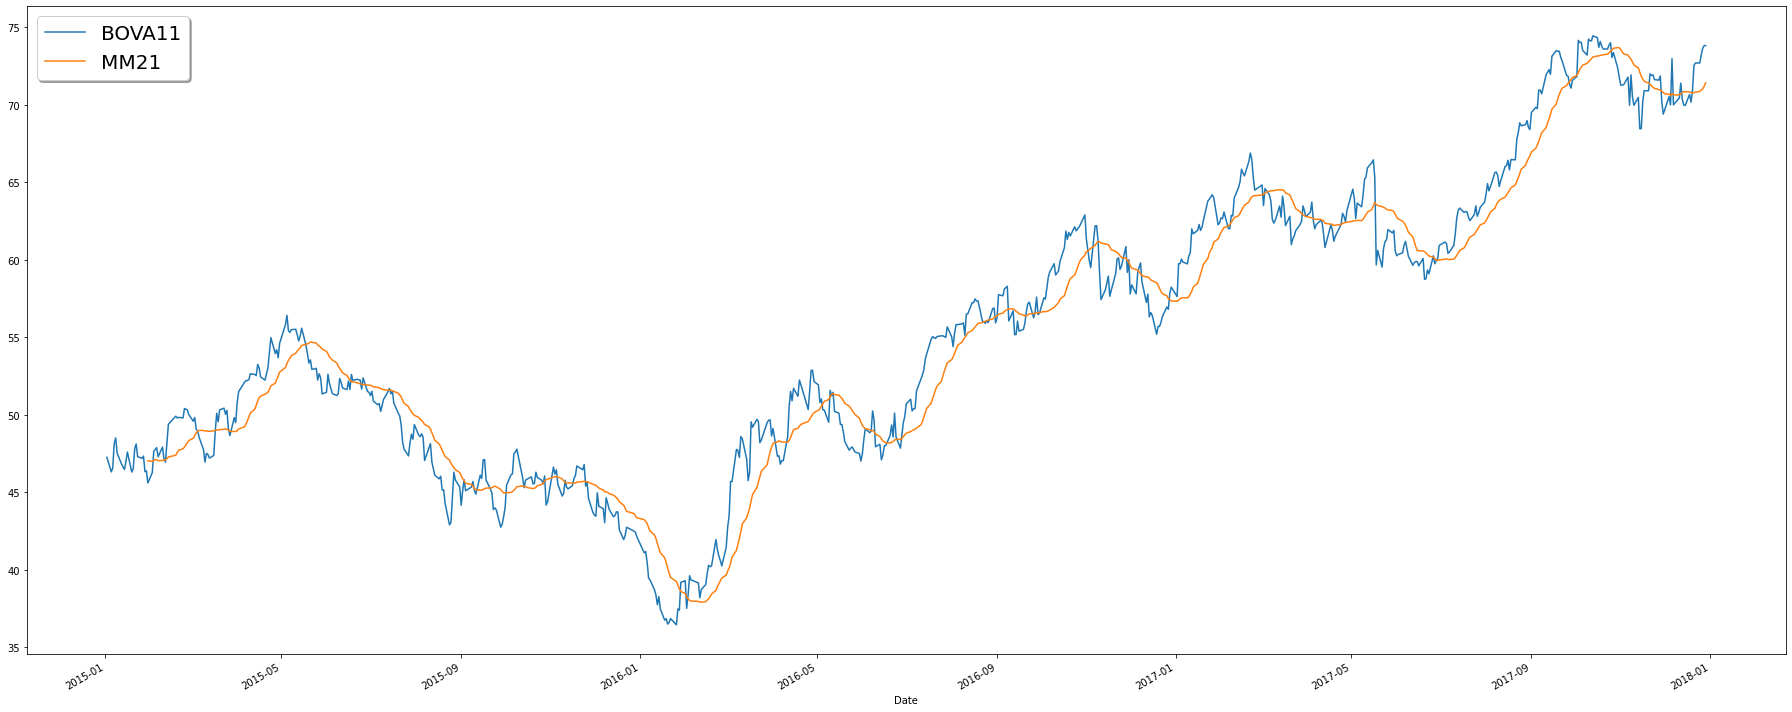

In [7]:
#selecionando um intervalo.
bova_fatiado = bova11[(bova11.index.year <= 2017) & (bova11.index.year>=2015)]
bova_fatiado["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova_fatiado["Adj Close"].rolling(21).mean().plot(label ="MM21")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

In [8]:
#Com essa base eu consigo selecionar qualquer ano, mês e dia da minha base de dados.
bova_dez = bova11[(bova11.index.month == 12) & (bova11.index.day==11)]
bova_dez

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-12-11,39.369999,39.830002,38.660000,38.889999,38.889999,164200
2009-12-11,68.279999,68.940002,68.279999,68.730003,68.730003,242400
2012-12-11,58.110001,58.619999,57.810001,58.290001,58.290001,1440650
2013-12-11,49.849998,49.849998,48.810001,48.810001,48.810001,610110
2014-12-11,48.119999,48.619999,47.450001,48.369999,48.369999,1467050
2015-12-11,43.810001,44.619999,43.680000,43.919998,43.919998,3775130
2017-12-11,70.790001,70.930000,70.019997,70.440002,70.440002,2273950
2018-12-11,84.000000,84.400002,82.489998,83.500000,83.500000,4130900
2019-12-11,106.820000,107.000000,106.400002,106.750000,106.750000,4106850


#Correlação entre ativos

In [26]:
ativos = ["^BVSP", "USDBRL=X"]
carteira = wb.get_data_yahoo(ativos, start = "2007-01-01" )["Adj Close"]
carteira = carteira.dropna()

[*********************100%***********************]  2 of 2 completed


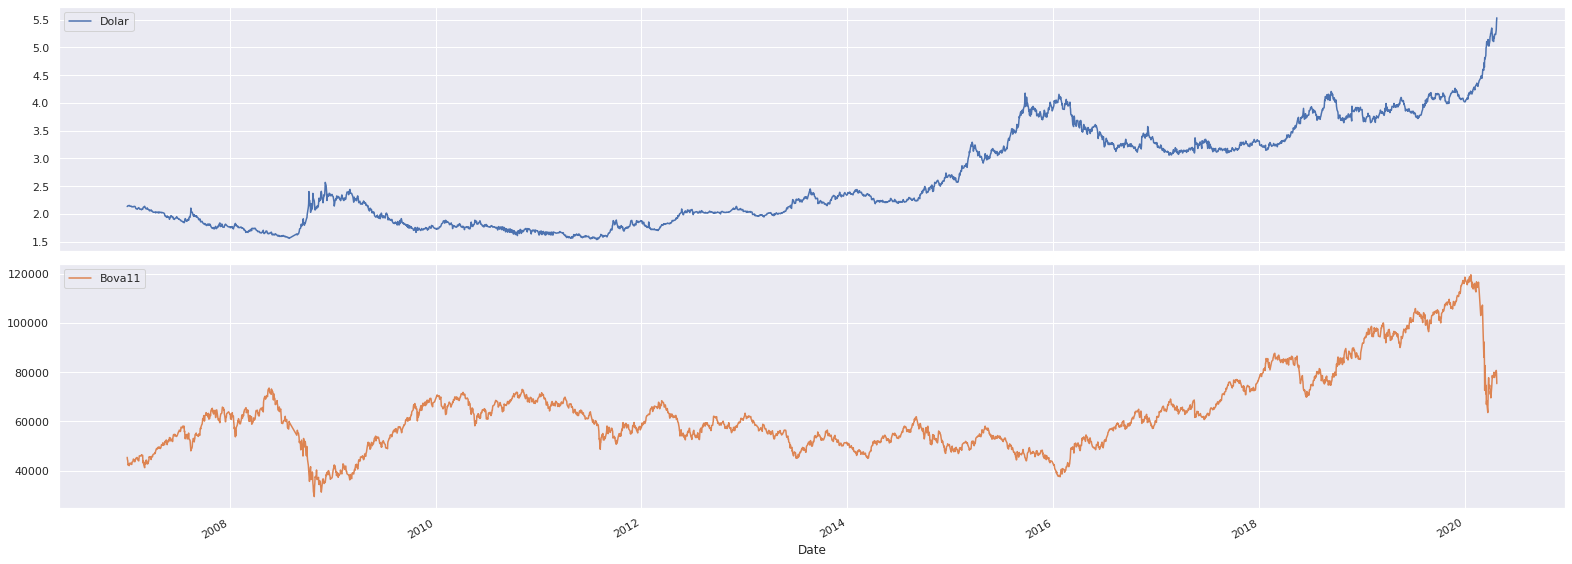

In [47]:
#plotando em gráficoa diferentes, pois os ativos estão em escalas diferentes.
carteira.columns = ["Dolar", "Bova11"]
carteira.plot(subplots=True, figsize=(22,8))
plt.tight_layout();

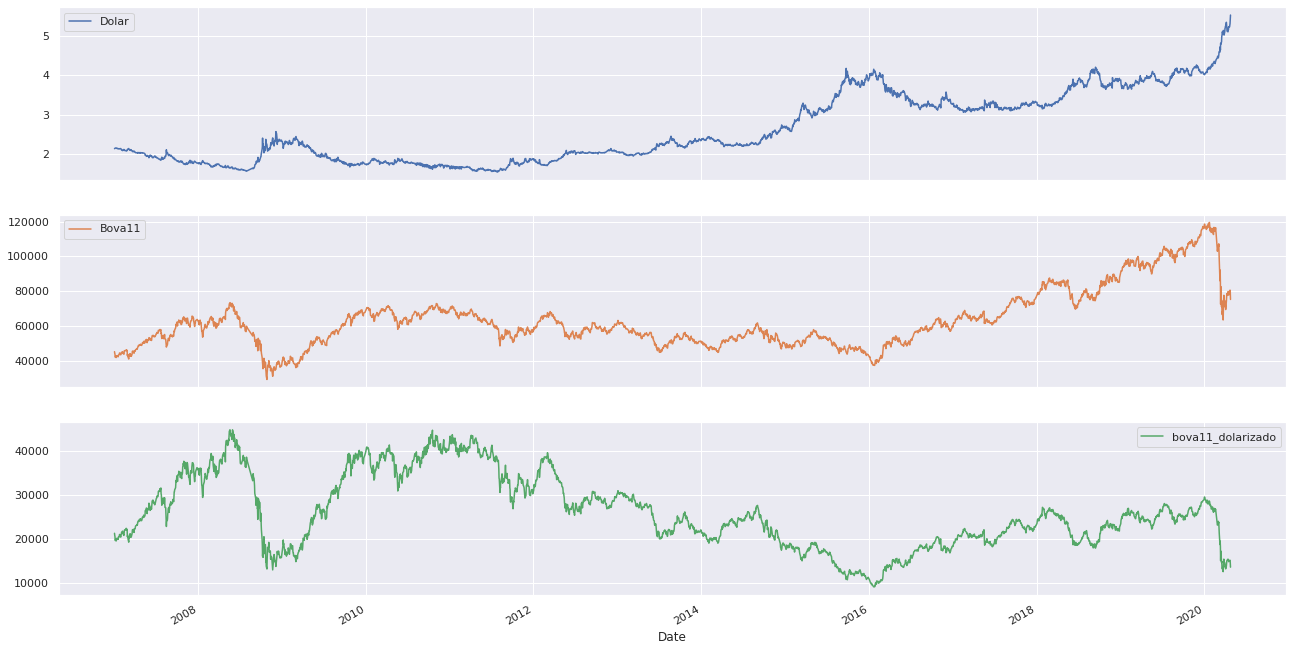

In [63]:
sns.set()
carteira.plot(subplots=True, figsize=(22,12))
plt.show();

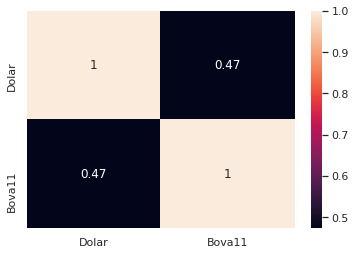

In [49]:
#Correlação entre Dolar e IBOV da minha Base inteira.
sns.heatmap(carteira.corr(), annot = True)
plt.show();

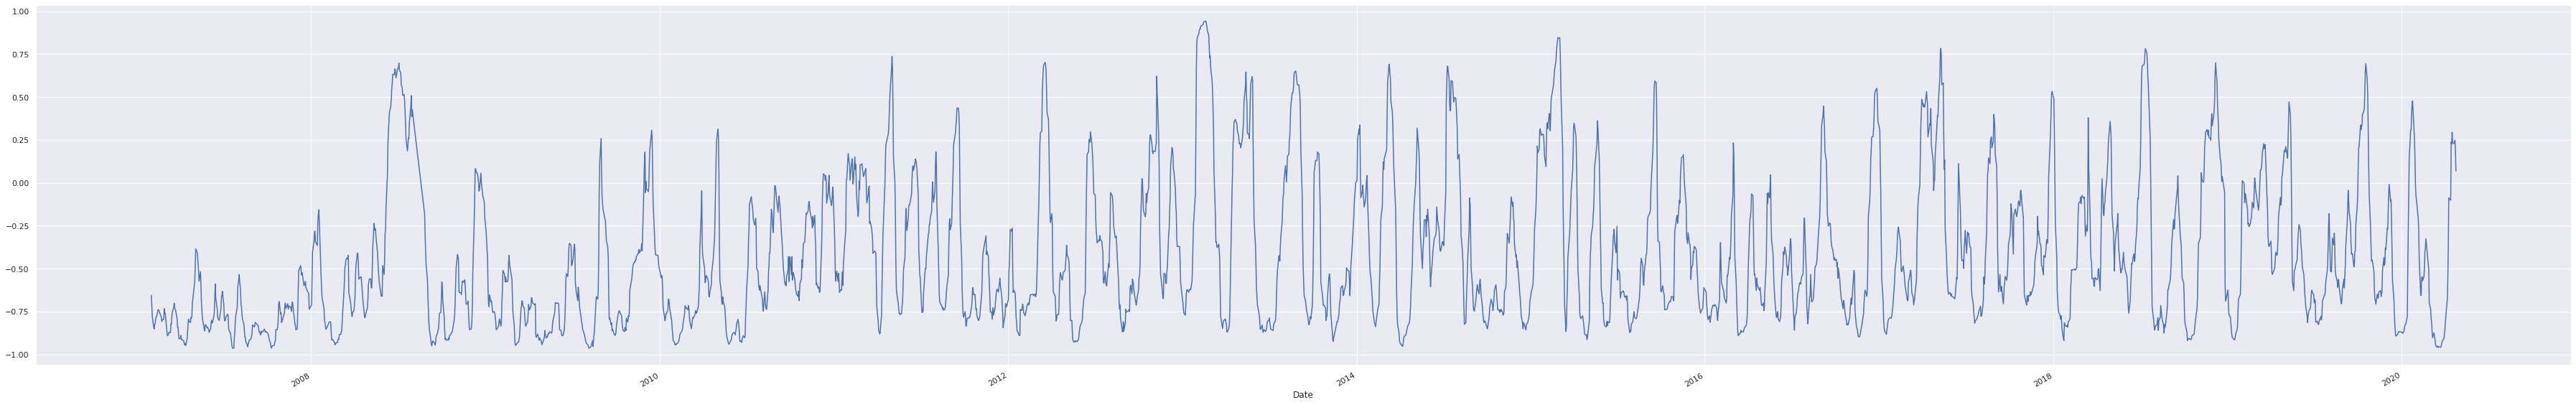

In [59]:
#Correlação entre o Dolar e Bova11 período de 21(mês) dias da minha base.
carteira["Dolar"].rolling(21).corr(carteira["Bova11"]).plot(figsize=(50,8))
plt.tight_layout();

In [62]:
carteira["bova11_dolarizado"] = carteira["Bova11"]/carteira["Dolar"]
pd.DataFrame(carteira["bova11_dolarizado"])

,bova11_dolarizado
Date,
2007-01-02,21296.573959
2007-01-03,20822.206345
2007-01-04,20579.710732
2007-01-05,19676.291819
2007-01-08,19953.411504
...,...
2020-04-17,15100.652442
2020-04-20,15092.208983
2020-04-22,15180.997014
